In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Data

## Import

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset.sample(5)

,Position,Level,Salary
3,Manager,4,80000
0,Business Analyst,1,45000
9,CEO,10,1000000
1,Junior Consultant,2,50000
4,Country Manager,5,110000


In [3]:
dataset.describe(include='all')

,Position,Level,Salary
count,10,10.00000,10.000000
unique,10,NaN,NaN
top,Business Analyst,NaN,NaN
freq,1,NaN,NaN
mean,NaN,5.50000,249500.000000
std,NaN,3.02765,299373.883668
min,NaN,1.00000,45000.000000
25%,NaN,3.25000,65000.000000
50%,NaN,5.50000,130000.000000
75%,NaN,7.75000,275000.000000


In [4]:
# Position is not required as the data is also encoded in Level
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

# Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()

In [11]:
lr.fit(X,y)

LinearRegression()

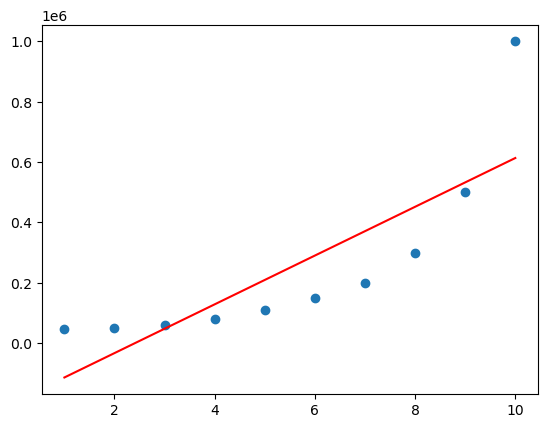

In [15]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='r')

# Polynomial Regression

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [18]:
poly_feat = PolynomialFeatures(2)
x_poly = poly_feat.fit_transform(X)
pr = LinearRegression()
pr.fit(x_poly,y)

LinearRegression()

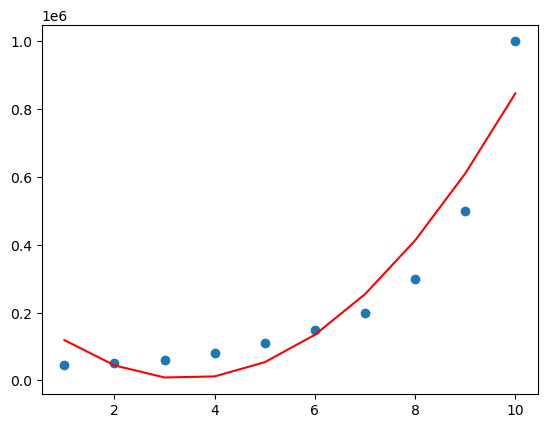

In [25]:
plt.scatter(X,y)
plt.plot(X,pr.predict(x_poly),color='r')

## Pipeline

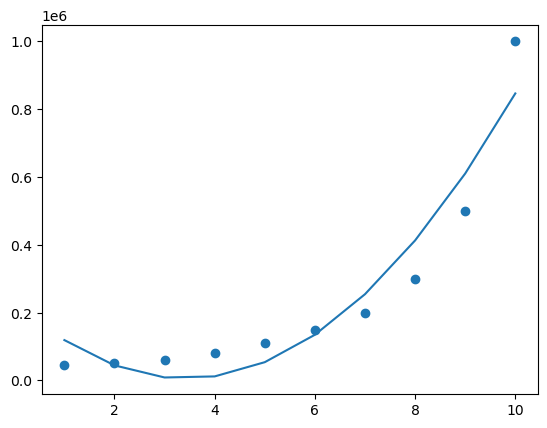

In [33]:
degree = 2
model = make_pipeline(PolynomialFeatures(degree),LinearRegression())
model.fit(X,y)
plt.scatter(X,y)
plt.plot(X,model.predict(X))

# Prediction

In [36]:
# Simple linear regression prediction
lr.predict([[6.5]])

array([330378.78787879])

In [42]:
# POlynomial regression prediction without pipeline
pr.predict(poly_feat.fit_transform([[6.5]]))

array([189498.10606061])

In [37]:
# Polynomial regression prediction with pipeline
model.predict([[6.5]])

array([189498.10606061])